In [1]:
import requests
from bs4 import BeautifulSoup as bs

# [네이트 판 댓글 예제](https://celltong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%8B%A4%EC%8A%B5-%EB%84%A4%EC%9D%B4%ED%8A%B8-%ED%8C%90-%EB%8C%93%EA%B8%80-%EC%88%98%EC%A7%91)

## 디버깅 - html 문서 조회

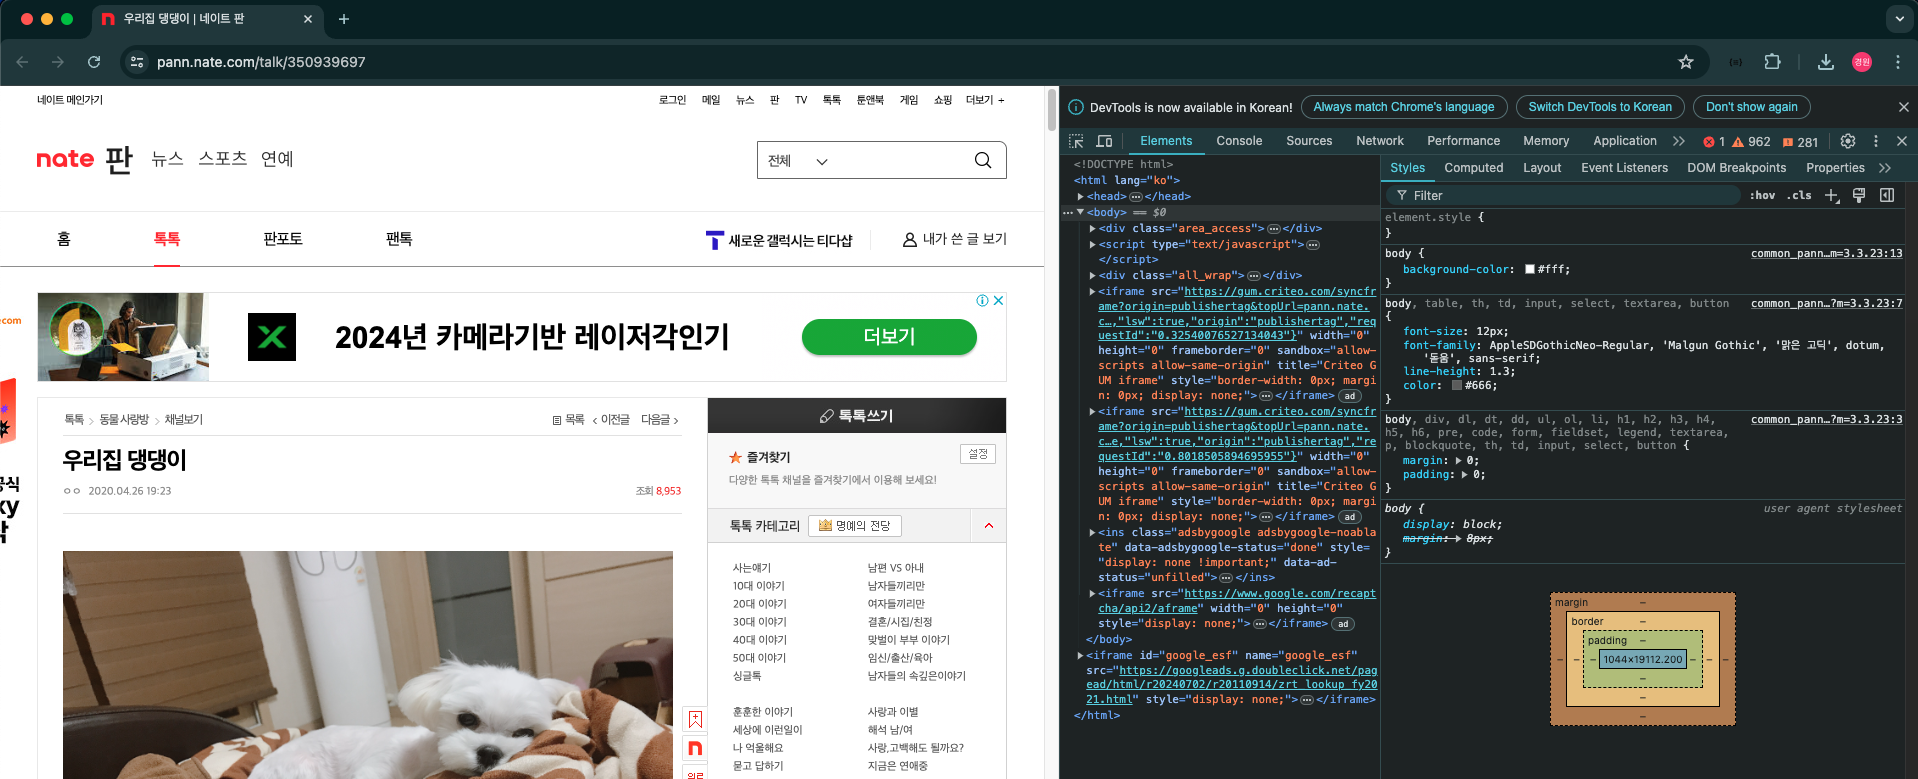

In [2]:
custom_header = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "referer": "https://pann.ante.com/"
}
url = "https://pann.nate.com/talk/350939697"
response = requests.get(url, headers=custom_header)
response.raise_for_status()
response.status_code

200

In [3]:
response.text

'<!DOCTYPE HTML>\n<html lang="ko">\n    <head>\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<title>우리집 댕댕이 | 네이트 판</title>\n<link href="/favicon.ico?m=3.3.23"  type="image/x-icon" rel="shortcut icon" /> \n<link href="/pann_css/content_css.css?m=3.3.23"  rel="stylesheet" type="text/css" media="all" charset="utf-8" /><link href="/css/common_pann_v4.css?m=3.3.23"  rel="stylesheet" type="text/css" media="all" charset="utf-8" /><link href="/css/aticle_v3.css?m=3.3.23"  rel="stylesheet" type="text/css" media="all" charset="utf-8" /><link href="/css/editor.css?m=3.3.23"  rel="stylesheet" type="text/css" media="all" charset="utf-8" />\n<link href="/images/nate_pann.png?m=3.3.23"  rel="apple-touch-icon-precomposed" /><link href="/images/nate_pann.png?m=3.3.23"  rel="apple-touch-icon" />\n<script src="/js/common.js?m=2.2.7" type="text/javascript" ></script>\n<script src="/js/jquery-1.9.

In [4]:
soup = bs(response.text, "html.parser")
soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>우리집 댕댕이 | 네이트 판</title>
<link href="/favicon.ico?m=3.3.23" rel="shortcut icon" type="image/x-icon"/>
<link charset="utf-8" href="/pann_css/content_css.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/common_pann_v4.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/aticle_v3.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/editor.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/>
<link href="/images/nate_pann.png?m=3.3.23" rel="apple-touch-icon-precomposed"/><link href="/images/nate_pann.png?m=3.3.23" rel="apple-touch-icon"/>
<script src="/js/common.js?m=2.2.7" type="text/javascript"></script>
<script src="/js/jquery-1.9.1.js?m=2.2.7" type="text/javascrip

## 디버깅 - 댓글 추출

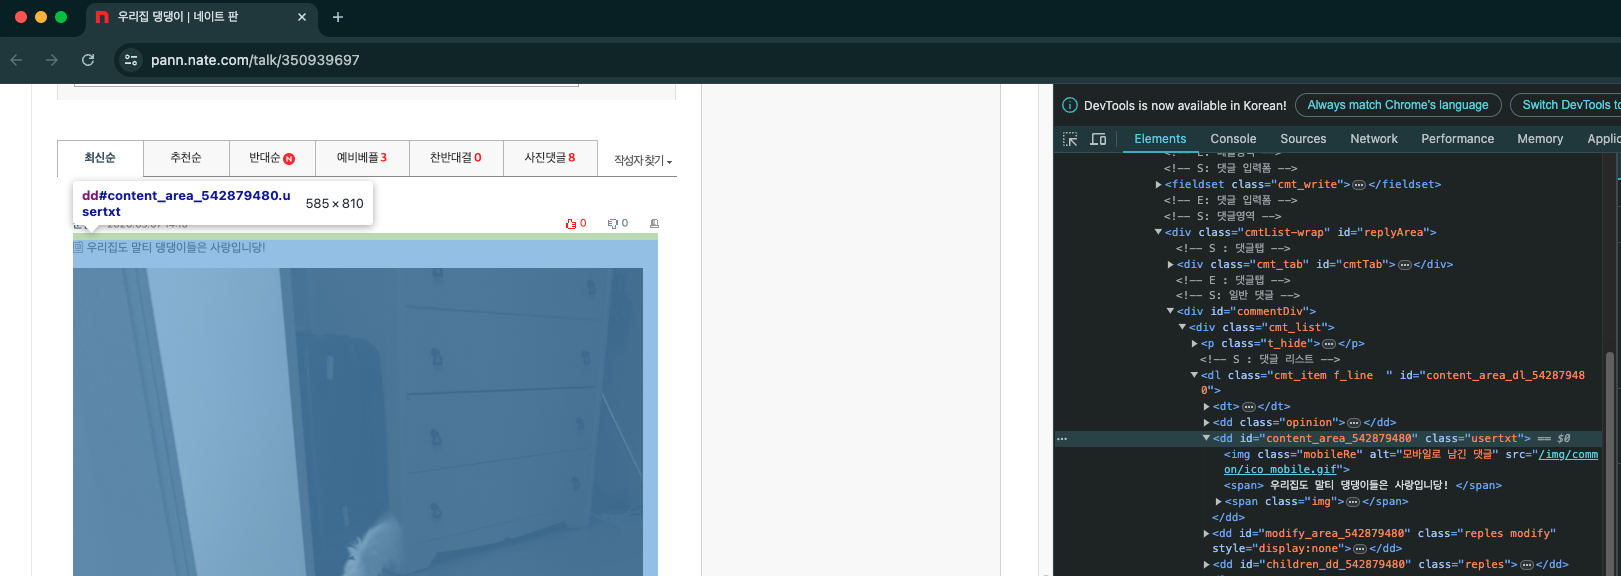

In [5]:
dd_list = soup.find_all("dd", class_="usertxt")
print(len(dd_list))

20


In [6]:
dd_list[0].get_text()

'\n 우리 댕댕이ㅋ\n\n\n '

In [7]:
dd_list[0].get_text().replace("\n","").replace("\t","") # 텝과 줄바꿈 제거

' 우리 댕댕이ㅋ '

## 함수

In [8]:
def main():
    custom_header = {
        "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
        "referer": "https://pann.ante.com/"
    }
    url = "https://pann.nate.com/talk/350939697"
    response = requests.get(url, headers=custom_header)
    response.raise_for_status()
    soup = bs(response.text, "html.parser")

    return soup

In [9]:
soup = main()
soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>우리집 댕댕이 | 네이트 판</title>
<link href="/favicon.ico?m=3.3.23" rel="shortcut icon" type="image/x-icon"/>
<link charset="utf-8" href="/pann_css/content_css.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/common_pann_v4.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/aticle_v3.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/><link charset="utf-8" href="/css/editor.css?m=3.3.23" media="all" rel="stylesheet" type="text/css"/>
<link href="/images/nate_pann.png?m=3.3.23" rel="apple-touch-icon-precomposed"/><link href="/images/nate_pann.png?m=3.3.23" rel="apple-touch-icon"/>
<script src="/js/common.js?m=2.2.7" type="text/javascript"></script>
<script src="/js/jquery-1.9.1.js?m=2.2.7" type="text/javascrip

In [10]:
def crawling(soup):
    dd_list = soup.find_all("dd", class_="usertxt")

    for idx, dd in enumerate(dd_list):
        comment = dd.get_text().replace("\n","").replace("\t","")
        print(f'{idx}번째 댓글\n>> {comment}')

In [11]:
crawling(soup)

0번째 댓글
>>  우리 댕댕이ㅋ 
1번째 댓글
>> 우리집도 말티 댕댕이들은 사랑입니당! 
2번째 댓글
>> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 다이쁨 완전 얼짱이넹
3번째 댓글
>> 우리 딸랑이 
4번째 댓글
>> 말티는 사랑입니당^^ 
5번째 댓글
>> 너무 귀엽당^^
6번째 댓글
>> 밑에서 두번째 사진 털때문인지 뾰루퉁한거 넘 귀여워요 ㅋㅋㅋㅋㅋ!울집강아지도 털때문에 가끔 눈이 화난눈 되거든요 ㅎㅎㅎㅎ 귀엽 ㅠ.ㅠ*
7번째 댓글
>> 우리집도 
8번째 댓글
>> 달릴 때 졸귘ㅋㅋ 눈이랑 코랑 동글동글 너무 귀엽 ㅠㅠㅠㅠㅠ
9번째 댓글
>> 안녕 칭구 
10번째 댓글
>> 개똥냄새 쩔게 생겼네
11번째 댓글
>> 안녕 난 두부야 
12번째 댓글
>> 아 너모 이쁘다. 항상 건강하자 아가
13번째 댓글
>> 힐링하고 갑니다❤️
14번째 댓글
>> 안뇽 ? 
15번째 댓글
>> 네츄럴 부스스.. 예쁘네요..^^
16번째 댓글
>> 으악 싑알 넘귀여워 말티즈 사랑해말티즈최고 말티즈 너무귀엽다
17번째 댓글
>> 순백의 청순함에서 깨발랄 ㅋ귀엽네요
18번째 댓글
>> 우리 댕댕이ㅋ 
19번째 댓글
>> 어머나!


# 연습예제들
- [영화 리뷰](https://celltong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%8B%A4%EC%8A%B5-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EC%88%98)
- [음원차트](https://celltong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%8B%A4%EC%8A%B5-%EB%B2%85%EC%8A%A4%EB%AE%A4%EC%A7%81-%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8-%EC%B6%94%EC%B6%9C)
- [네이버 속보 기사](https://celltong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EA%B0%84%EB%8B%A8-%EC%8B%A4%EC%8A%B5-%EB%84%A4%EC%9D%B4%EB%B2%84-%EC%97%B0%ED%95%A9%EB%89%B4%EC%8A%A4-%EC%86%8D%EB%B3%B4-%EA%B8%B0%EC%82%AC%EC%A0%9C%EB%AA%A9-%EC%B6%94%EC%B6%9C)
- [네이버 헤드 뉴스](https://celltong.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%AC%EB%A1%A4%EB%A7%81-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%8B%A4%EC%8A%B5-%EB%84%A4%EC%9D%B4%EB%B2%84-%ED%97%A4%EB%93%9C-%EB%89%B4%EC%8A%A4-%EC%B0%BE%EA%B8%B0)